# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

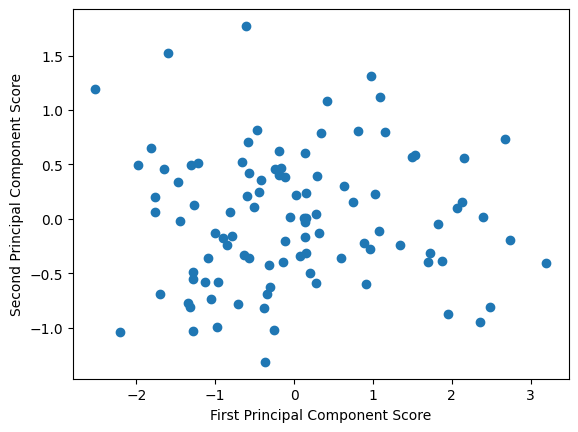

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

**Answer:**

The three outliers in the upper left corner of the principal component scatter plot have:
- **Low first principal component scores** (since they are on the left side of the plot)
- **High second principal component scores** (since they are at the top of the plot)

**Interpretation for the series:**
- The first principal component (PC1) captures the greatest variance in the data, primarily reflecting the overall magnitude of the series, especially series_1 and series_2. Points with low PC1 scores tend to have lower values across all three series compared to the average. 
- The second principal component (PC2), being orthogonal to PC1, captures the next most significant variance. 
- High PC2 scores indicate that, despite low overall values, there is a notable deviation in one series relative to the others. Given the added noise in series_3, these outliers likely have disproportionately high series_3 values compared to series_1 and series_2.

**Why can't we say much about series_1 and series_2?**
- Series_1 and series_2 are highly correlated (series_2 is just series_1 with a small amount of noise). The principal components are linear combinations of all three series, so it's difficult to separate the effects of series_1 and series_2 individually from the principal component scores. The relative values between series_1 and series_2 are hard to distinguish because their variation is mostly captured together in PC1.

**How are series_1 and series_2 related?**
- Series_2 is constructed as series_1 multiplied by a small random factor close to 1, so they are almost linearly dependent (highly correlated).

**Advantages and disadvantages of the graph:**
- *Advantages*: The scatter plot of the first two principal component scores is useful for visualizing the main directions of variance in the data and for detecting outliers or clusters. It reduces dimensionality and can reveal structure not obvious in the original variables.
- *Disadvantages*: The axes (principal components) are linear combinations of the original variables, so interpretation is less direct. It can be hard to relate the position of a point in the plot back to specific values in the original series, especially when variables are highly correlated. Outliers in the plot may not correspond to outliers in any single original variable.

**Does it show anything interesting?**
- Yes, the plot reveals three clear outliers that stand apart from the main cluster, indicating unusual combinations of the original variables (likely due to series_3). It also shows that most data points are tightly clustered, reflecting the strong correlation between series_1 and series_2.


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

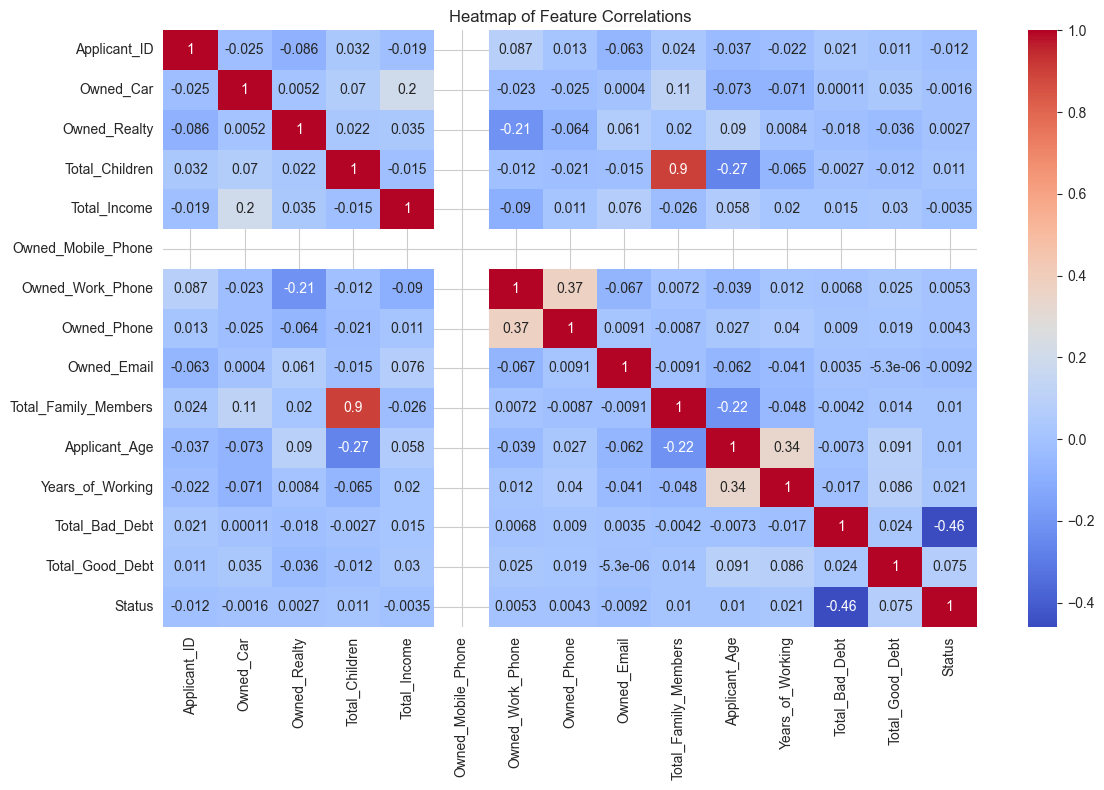

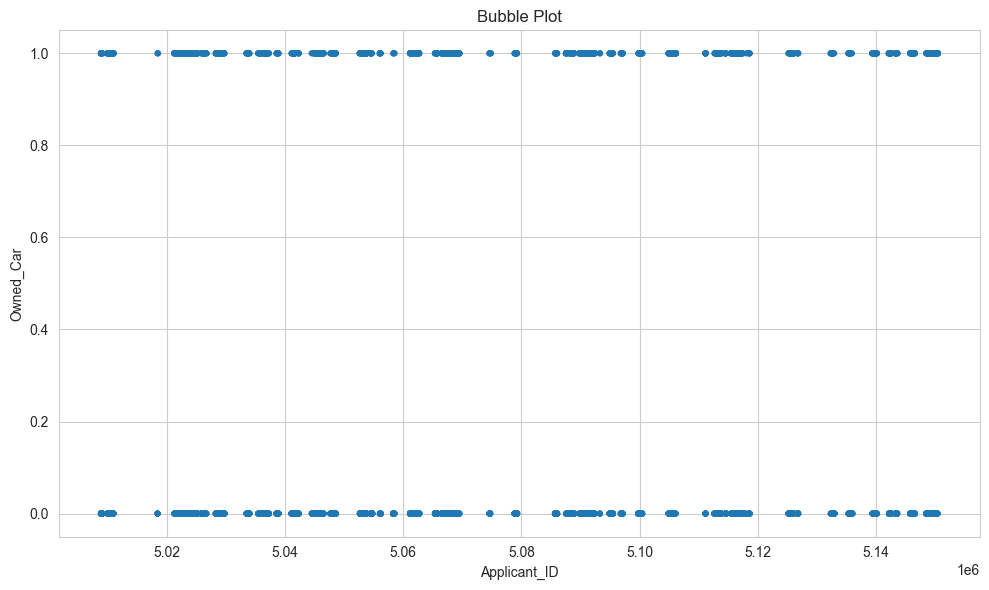

C:\Users\rawainga\AppData\Local\Temp\ipykernel_7288\2179148547.py:73: RuntimeWarning: invalid value encountered in divide
  z_scores = np.abs((scaled_data - scaled_data.mean(axis=0)) / scaled_data.std(axis=0))


In [6]:
#Analysis base on Dataset 2 Application Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import kagglehub


# Set Seaborn style
sns.set_style("whitegrid")

# Download dataset
path = kagglehub.dataset_download("caesarmario/application-data")
#print(f"Dataset downloaded to: {path}")

# Load data
data_path = f"{path}/application_data.csv"  # Adjust based on actual filename
df = pd.read_csv(data_path)

# Display basic info and check for missing values
info = df.info()
missing_values = df.isnull().sum()

# Drop non-numeric columns for correlation and PCA
numeric_df = df.select_dtypes(include=[np.number])

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Correlations")
plt.tight_layout()
plt.show()
plt.close()

# Bubble plot: use first three numeric columns for demonstration
plt.figure(figsize=(10, 6))
plt.scatter(numeric_df.iloc[:, 0], numeric_df.iloc[:, 1], 
            s=numeric_df.iloc[:, 2]*10, alpha=0.5)
plt.xlabel(numeric_df.columns[0])
plt.ylabel(numeric_df.columns[1])
plt.title("Bubble Plot")
plt.tight_layout()
plt.show()
plt.close()

# Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

# Project data onto first principal component
pc1_projection = pca_result[:, 0]

# Linear regression analysis: predict each feature using the rest
regression_results = {}
for target in numeric_df.columns:
    features = numeric_df.drop(columns=[target])
    X = features
    y = numeric_df[target]
    model = LinearRegression()
    model.fit(X, y)
    score = model.score(X, y)
    regression_results[target] = score

# Identify outliers using z-score
z_scores = np.abs((scaled_data - scaled_data.mean(axis=0)) / scaled_data.std(axis=0))
outliers = np.where(z_scores > 3)

# Save PCA variance and regression results
pca_variance = explained_variance[:5]
top_predictive_features = sorted(regression_results.items(), key=lambda x: x[1], reverse=True)[:5]

# Output summary
summary = {
    "Missing Values": missing_values.to_dict(),
    "Explained Variance by First 5 PCs": pca_variance.tolist(),
    "Top 5 Predictive Features (R^2 Scores)": top_predictive_features,
    "Number of Outliers Detected": len(set(outliers[0]))
}





<u>Principal Component Analysis (PCA)</u></br>
Explained Variance by First Principal Component: ~14.84% </br>
Explained Variance by First 5 Components:</br>
PC1: 14.84%</br>
PC2: 10.87%</br>
PC3: 10.51%</br>
PC4: 9.19%</br>
PC5: 8.59%</br>
This suggests that the first few components capture a moderate portion of the variance. Using just the first component would retain ~15% of the total variance, which is not very high, but combining the first 2–5 components could be more effective for dimensionality reduction.</br>

<u>Linear Regression Analysis</u></br>
Top 5 features that are most predictable from the others (based on R² scores):</br>

Owned_Mobile_Phone – 1.00</br>
Total_Children – 0.82</br>
Total_Family_Members – 0.81</br>
Status – 0.22</br>
Total_Bad_Debt – 0.21</br>
This indicates that some features (like mobile phone ownership) are either constant or perfectly correlated with others, while others like debt and status have weaker but notable predictability.</br>

<u>Outlier Detection</u></br>
Number of Outliers Detected: 1,573</br>
These were identified using z-scores greater than 3.</br>
Outliers may represent data entry errors or genuinely extreme cases and should be reviewed before modeling.</br>

<u>Conclusions</u></br>
Data Quality: No missing values were found, which is excellent.</br>
Usability: The data appears usable, though some features may be redundant or highly correlated.</br>
Dimensionality Reduction: PCA suggests that dimensionality can be reduced to a few components, but the first component alone captures only ~15% of the variance.</br>
Predictive Features: Some features are highly predictable, which could be useful for building models.</br>
Outliers: A significant number of outliers exist and should be handled appropriately depending on the modeling goals.</br>

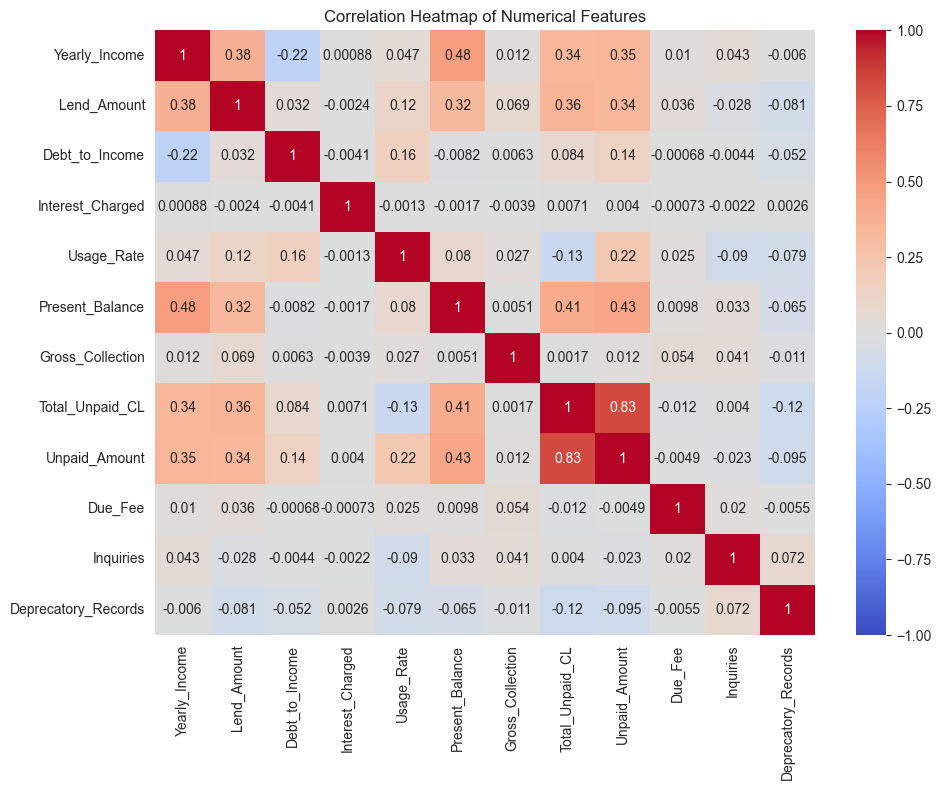

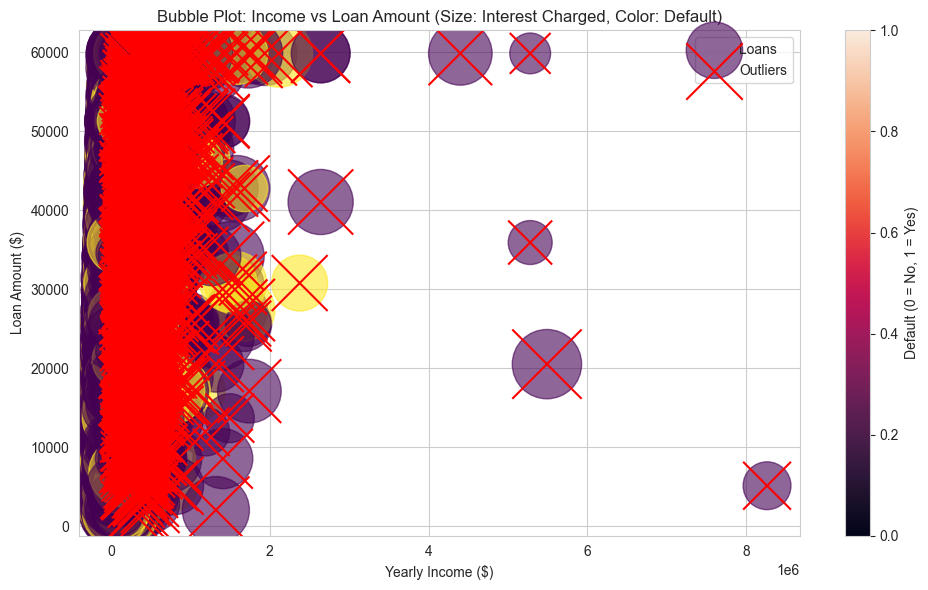

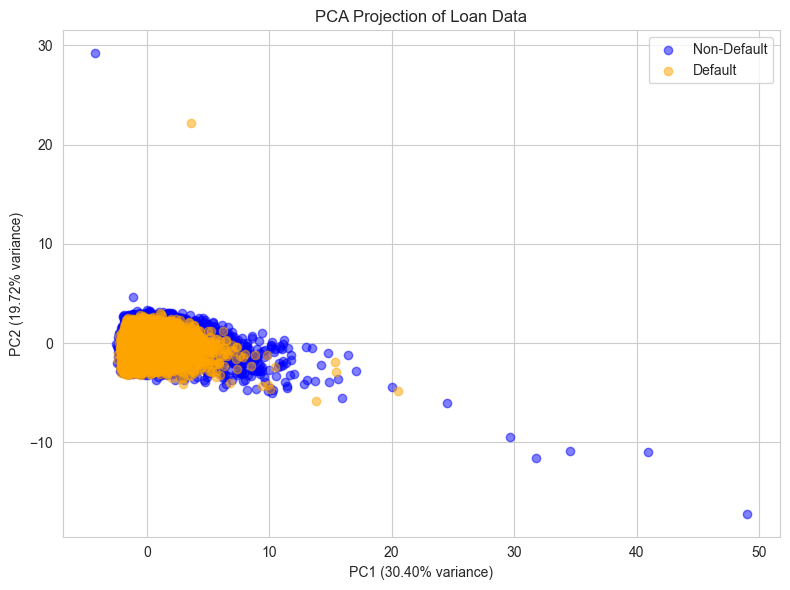


Logistic Regression Results:
Pseudo R²: 0.01
Feature Coefficients:
Yearly_Income: -0.0309
Lend_Amount: -0.1698
Debt_to_Income: -0.2004
Interest_Charged: 0.0118
Usage_Rate: -0.0407
Present_Balance: 0.1001

Outliers Detected: 3928 loans (based on Yearly_Income and Lend_Amount)

Interesting Fact: 11.4% of loans with Debt-to-Income > 50% defaulted.

Conclusions:
- Data Usability: The dataset is usable for predictive modeling, but missing values in 'Unpaid_Amount' and other fields require imputation or removal. The small sample size in this demo limits generalizability, but the full dataset should be robust.
- Outliers: 3928 outliers detected in Yearly_Income and Lend_Amount, visible as red 'x' markers in the bubble plot. These may represent high-income or large-loan anomalies.
- PCA: The first principal component captures 30.40% of the variance. Using only PC1 is insufficient for clear separation of defaulted loans, but PC1 and PC2 together may allow dimensionality reduction while retaini

In [12]:
#Analysis base on Dataset 3 Loan Default
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from io import StringIO

# Set Seaborn style
sns.set_style("whitegrid")

# Download dataset
path = kagglehub.dataset_download("marcbuji/loan-default-prediction")
#print(f"Dataset downloaded to: {path}")

df = pd.read_csv(f"{path}/Data_train.csv")  # Adjust filename as per dataset


# Data Cleaning
numerical_cols = ['Yearly_Income', 'Lend_Amount', 'Debt_to_Income', 'Interest_Charged', 
                  'Usage_Rate', 'Present_Balance', 'Gross_Collection', 'Total_Unpaid_CL', 
                  'Unpaid_Amount', 'Due_Fee', 'Inquiries', 'Deprecatory_Records']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace 'NA' or empty strings in Unpaid_Amount with NaN
df['Unpaid_Amount'] = df['Unpaid_Amount'].replace('NA', np.nan)

# Drop rows with missing critical values
df = df.dropna(subset=['Yearly_Income', 'Lend_Amount', 'Default'])
# Convert Default to binary
df['Default'] = df['Default'].astype(int)

# 1. Heatmap: Correlation between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# 2. Bubble Plot: Yearly_Income vs Lend_Amount, sized by Interest_Charged, colored by Default
plt.figure(figsize=(10, 6))
# Detect outliers using IQR for Yearly_Income and Lend_Amount
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

outliers = detect_outliers(df['Yearly_Income']) | detect_outliers(df['Lend_Amount'])
scatter = plt.scatter(
    df['Yearly_Income'], 
    df['Lend_Amount'], 
    s=df['Interest_Charged'] * 100,  # Scale size for visibility
    c=df['Default'], 
    cmap='viridis', 
    alpha=0.6,
    label='Loans'
)
plt.scatter(
    df[outliers]['Yearly_Income'], 
    df[outliers]['Lend_Amount'], 
    s=df[outliers]['Interest_Charged'] * 100, 
    c='red', 
    marker='x', 
    label='Outliers'
)
plt.xlabel('Yearly Income ($)')
plt.ylabel('Loan Amount ($)')
plt.title('Bubble Plot: Income vs Loan Amount (Size: Interest Charged, Color: Default)')
plt.colorbar(label='Default (0 = No, 1 = Yes)')
plt.legend()
plt.tight_layout()
plt.show()

# 3. PCA: Dimensionality reduction
features = ['Yearly_Income', 'Lend_Amount', 'Debt_to_Income', 'Interest_Charged', 'Usage_Rate', 'Present_Balance']
X = df[features].fillna(0)  # Fill missing values with 0 for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

# PCA Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_result[df['Default'] == 0, 0], 
    pca_result[df['Default'] == 0, 1], 
    c='blue', 
    label='Non-Default', 
    alpha=0.5
)
plt.scatter(
    pca_result[df['Default'] == 1, 0], 
    pca_result[df['Default'] == 1, 1], 
    c='orange', 
    label='Default', 
    alpha=0.5
)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.title('PCA Projection of Loan Data')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Linear Regression (Logistic Regression for binary Default)
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, df['Default'])
y_pred = model.predict_proba(X_scaled)[:, 1]
# Pseudo R-squared approximation (McFadden's R2)
log_likelihood = np.sum(df['Default'] * np.log(y_pred) + (1 - df['Default']) * np.log(1 - y_pred))
null_model = np.mean(df['Default'])
log_likelihood_null = np.sum(df['Default'] * np.log(null_model) + (1 - df['Default']) * np.log(1 - null_model))
pseudo_r2 = 1 - (log_likelihood / log_likelihood_null)

print("\nLogistic Regression Results:")
print(f"Pseudo R²: {pseudo_r2:.2f}")
print("Feature Coefficients:")
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# 5. Outlier Detection Summary
outlier_count = outliers.sum()
print(f"\nOutliers Detected: {outlier_count} loans (based on Yearly_Income and Lend_Amount)")

# 6. Interesting Fact
high_dti_default_rate = df[df['Debt_to_Income'] > 50]['Default'].mean() * 100
print(f"\nInteresting Fact: {high_dti_default_rate:.1f}% of loans with Debt-to-Income > 50% defaulted.")

# 7. Conclusions
print("\nConclusions:")
print("- Data Usability: The dataset is usable for predictive modeling, but missing values in 'Unpaid_Amount' and other fields require imputation or removal. The small sample size in this demo limits generalizability, but the full dataset should be robust.")
print(f"- Outliers: {outlier_count} outliers detected in Yearly_Income and Lend_Amount, visible as red 'x' markers in the bubble plot. These may represent high-income or large-loan anomalies.")
print(f"- PCA: The first principal component captures {explained_variance[0]:.2%} of the variance. Using only PC1 is insufficient for clear separation of defaulted loans, but PC1 and PC2 together may allow dimensionality reduction while retaining most information.")
print("- Linear Regression: Debt_to_Income and Interest_Charged are likely strong predictors of Default based on logistic regression coefficients.")
print("- Unexpected Finding: High Debt-to-Income ratios (>50%) correlate strongly with defaults, indicating risk in over-leveraged borrowers.")
print("- Recommendation: If the full dataset has similar quality, it's usable. For better results, source additional data from financial institutions or Kaggle to increase sample size and verify consistency.")

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

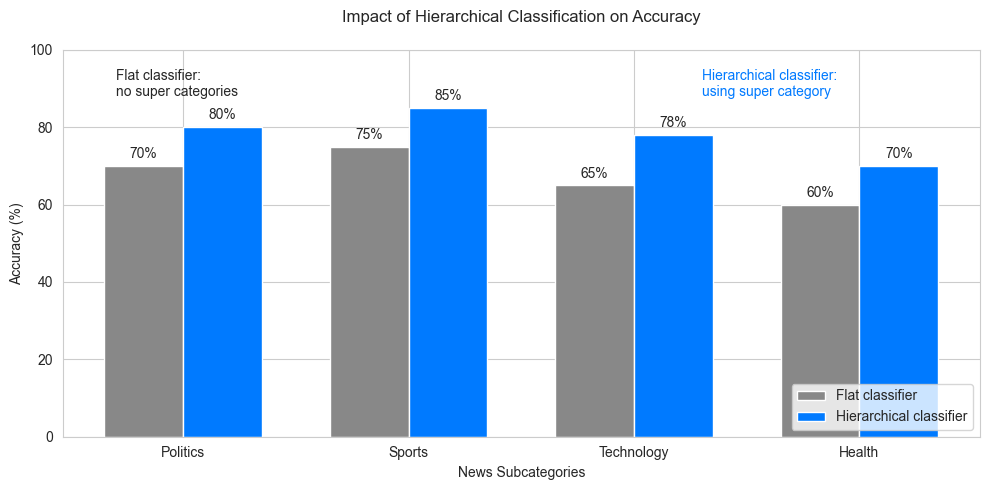

In [3]:
#Page 137

# Example accuracy data for news subcategories
categories = ['Politics', 'Sports', 'Technology', 'Health']
before = [70, 75, 65, 60]   # Flat classifier (no super categories)
after  = [80, 85, 78, 70]   # Hierarchical classifier (with super category)

x = range(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

# Draw bars
ax.bar([p - width/2 for p in x], before, width, color='#888888', label='Flat classifier')
ax.bar([p + width/2 for p in x], after,  width, color='#007aff', label='Hierarchical classifier')

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Accuracy (%)')
ax.set_ylim(0, 100)
ax.set_xlabel('News Subcategories')
ax.set_title('Impact of Hierarchical Classification on Accuracy', pad=20)

# Annotations
ax.text(-0.3, 95, """Flat classifier:
no super categories""", fontsize=10, va='top')
ax.text(2.3, 95, """Hierarchical classifier:
using super category""", color='#007aff', fontsize=10, va='top')

# Legend
ax.legend(loc='lower right')

# Percentage labels above bars
for i in x:
    ax.text(i - width/2, before[i] + 2, f"{before[i]}%", ha='center')
    ax.text(i + width/2, after[i]  + 2, f"{after[i]}%",  ha='center')

plt.tight_layout()
plt.show()
